# Analysis on NVIDIA Stock Price Change on US Unemployment Rate (With S&P 500 as a benchmark)
Over the past decade, AI has become one of the hottest sectors in the world. Companies are investing large amounts into AI infrastructure, which has created a large demand for NVIDIA products. As companies integrate more AI into their infrastructure, we expect them to replace certain jobs. Our hypothesis is that there may be a relationship between the demand for NVIDIA Stock Price and US Unemployment. The S&P 500 will be used as a benchmark to measure the overall economy’s health and help reduce noise. 

In [24]:
from config import fred_api_key, UNRATE_DATASET, SPY_DATASET, NVIDIA_DATASET, START_DATE, END_DATE, AI_BOOM_START_DATE, UNRATE_DATASET_COLOR, SPY_DATASET_COLOR, NVIDIA_DATASET_COLOR, RESULTS_DIR
from load import get_fred_data, get_stock_data
from analyze import plot_statistics, plot_correlation_analysis
from process import process_fred_data, process_stock_data

# FRED Data

In [25]:
# --- FRED Data with COVID ---
fred_raw_data = get_fred_data(UNRATE_DATASET, START_DATE, END_DATE, fred_api_key)
fred_processed_data_covid = process_fred_data(fred_raw_data, 'Unemployment Rate', covid = True)
fred_processed_data_covid.head()

--- Extracting data from FRED: UNRATE ---
Extracting UNRATE...
--- Processing Unemployment Rate Dataset
Processing Unemployment Rate


,Date,Unemployment Rate
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0


--- Plotting basic statistics for Unemployment Rate With Covid ---


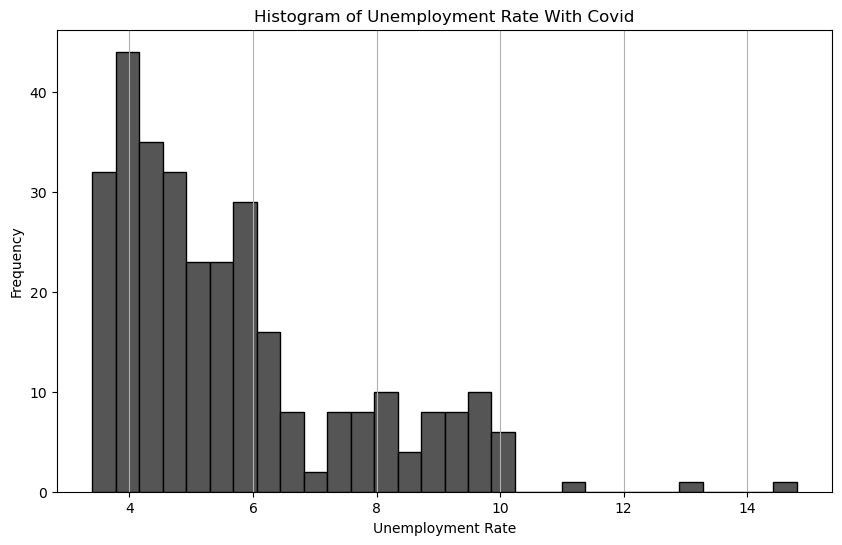

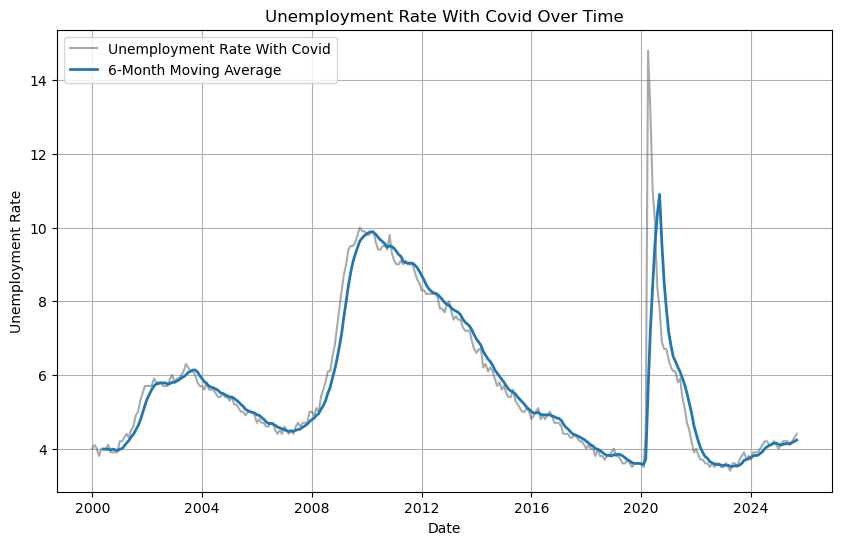

In [26]:
plot_statistics(fred_processed_data_covid, 'Unemployment Rate With Covid', result_dir=RESULTS_DIR, color = UNRATE_DATASET_COLOR,notebook_plot=True)

In [ ]:
# --- FRED Data with COVID Data Smoothed--
fred_processed_data = process_fred_data(fred_raw_data, 'Unemployment Rate', False)
fred_processed_data.head()


--- Processing Unemployment Rate Dataset
Processing Unemployment Rate


,Date,Unemployment Rate
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0


--- Plotting basic statistics for Unemployment Rate ---


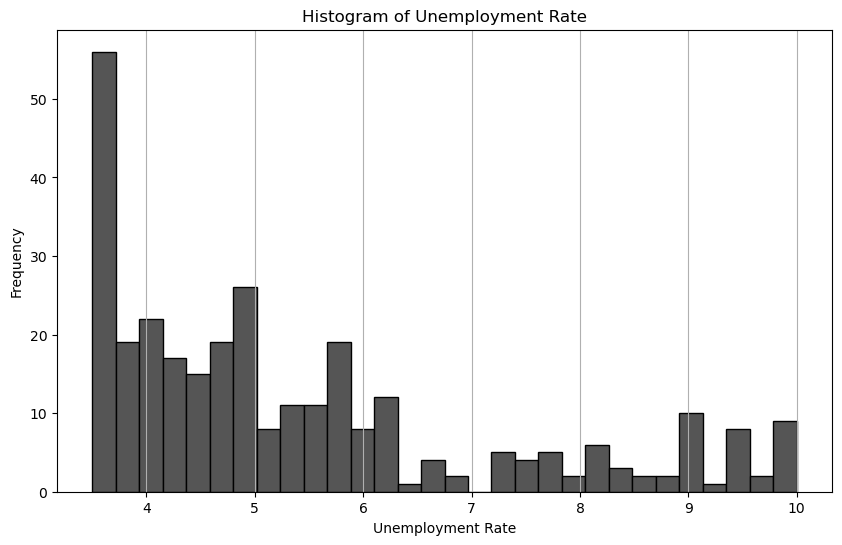

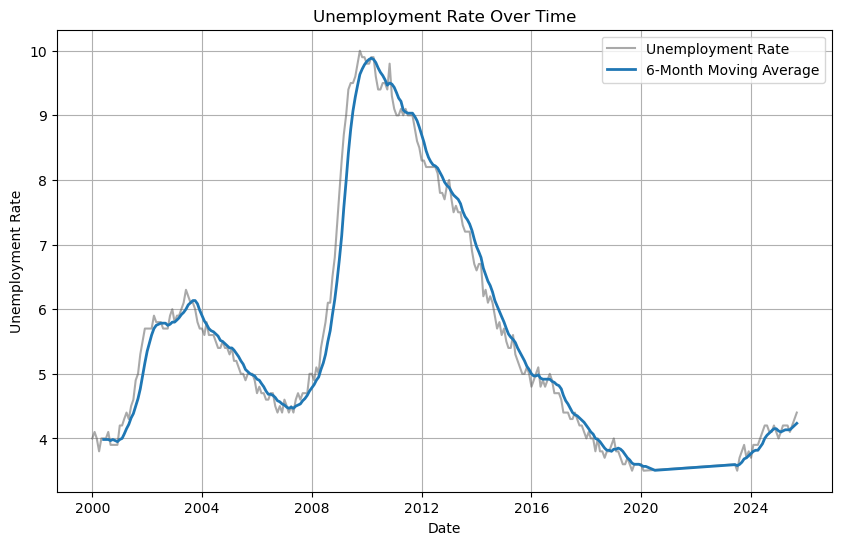

In [28]:
plot_statistics(fred_processed_data, 'Unemployment Rate', result_dir=RESULTS_DIR, color = UNRATE_DATASET_COLOR,notebook_plot=True)

# SPY Data

In [ ]:
#SPY Data without Log Transformation
spy_raw_data = get_stock_data(SPY_DATASET,  START_DATE, END_DATE, '1mo', True)
spy_processed_data  = process_stock_data(spy_raw_data, 'SPY', log = False)
spy_processed_data.head()

[*********************100%***********************]  1 of 1 completed

--- Extracting data from yfinance: SPY ---
Extracting SPY...
--- Processing SPY data---
Processing SPY...


,Date,Close
0,2000-01-01,88.175941
1,2000-02-01,86.833405
2,2000-03-01,95.007309
3,2000-04-01,91.903618
4,2000-05-01,90.458649


--- Plotting basic statistics for SPY Log Close Price ---


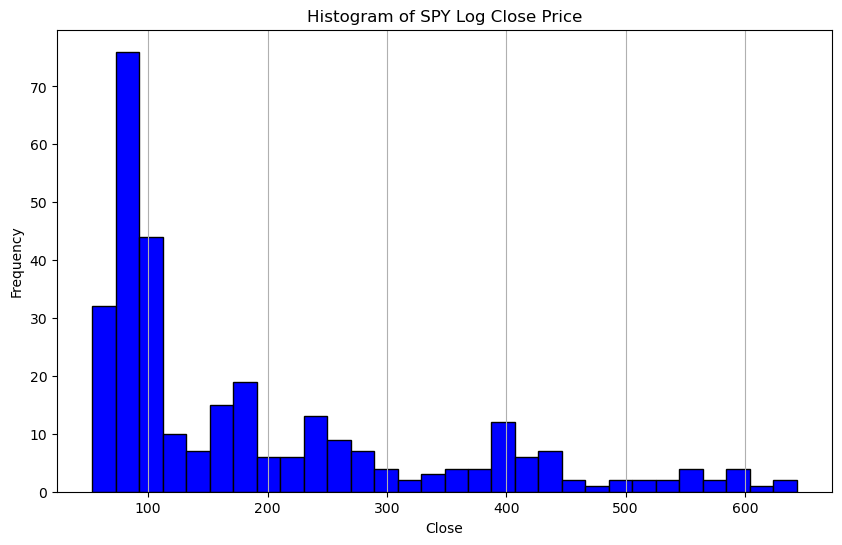

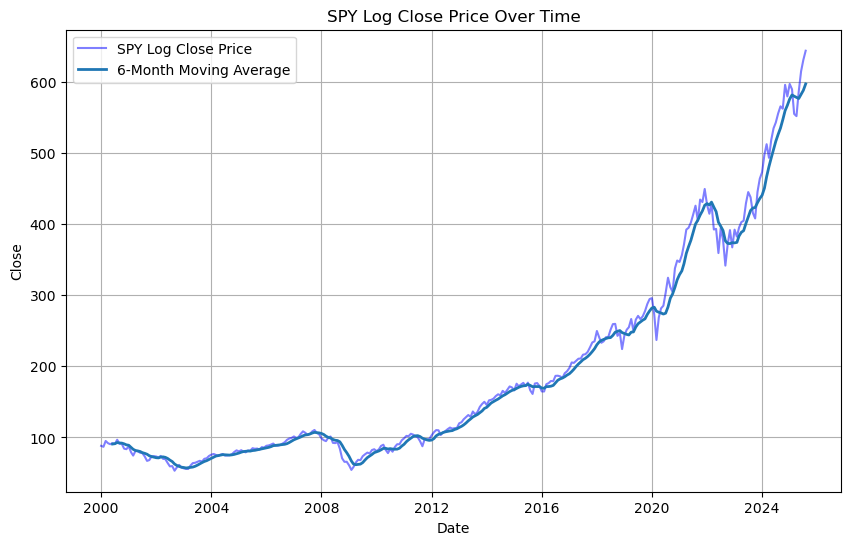

In [30]:
plot_statistics(spy_processed_data, 'SPY Log Close Price', result_dir=RESULTS_DIR, color = SPY_DATASET_COLOR, notebook_plot=True)

In [ ]:
#SPY Data with Log Transformation
spy_processed_log_data  = process_stock_data(spy_raw_data, 'SPY', log = True)
spy_processed_log_data.head()

--- Processing SPY data---
Processing SPY...


,Date,Log Close Price
0,2000-01-01,4.479334
1,2000-02-01,4.463991
2,2000-03-01,4.553954
3,2000-04-01,4.520740
4,2000-05-01,4.504893


--- Plotting basic statistics for SPY Log Close Price ---


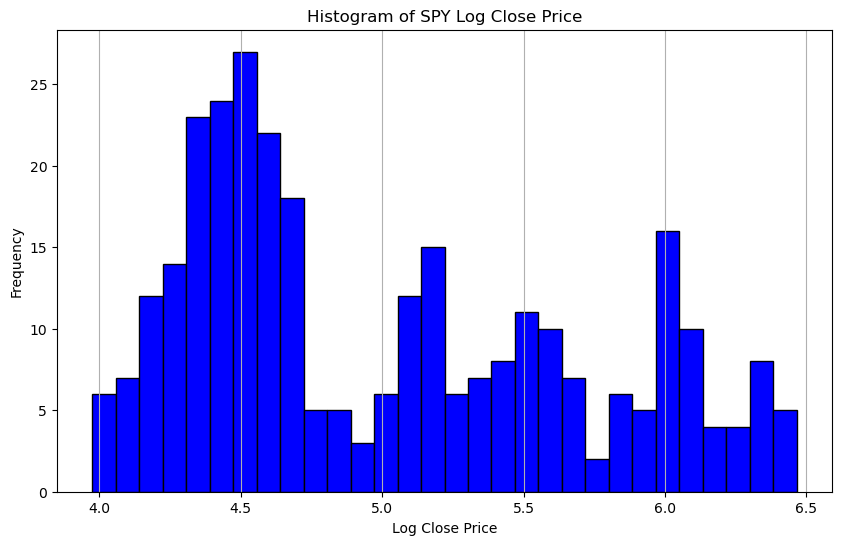

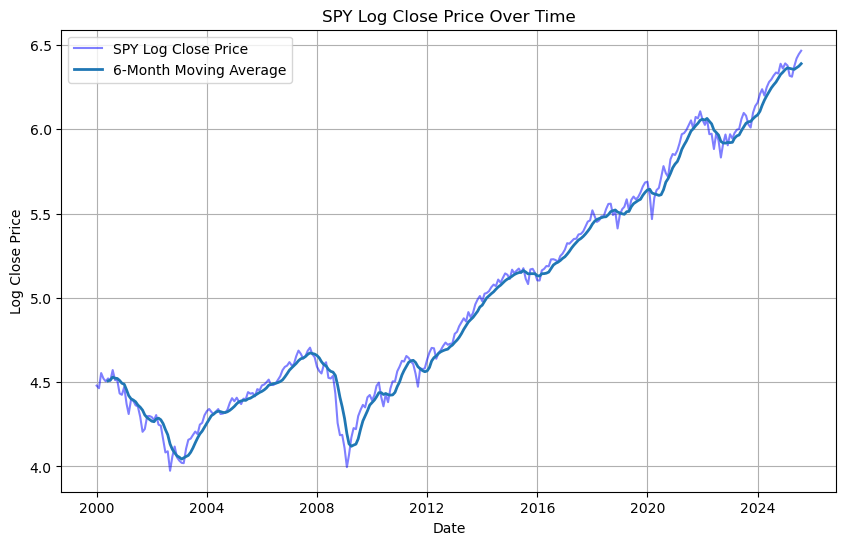

In [32]:
plot_statistics(spy_processed_log_data, 'SPY Log Close Price', result_dir=RESULTS_DIR, color = SPY_DATASET_COLOR, notebook_plot=True)

# NVIDIA Data

In [ ]:
#NVIDIA Raw Close Price Data
nvidia_raw_data = get_stock_data(NVIDIA_DATASET,  START_DATE, END_DATE, '1mo', True)
nvidia_processed_data  = process_stock_data(nvidia_raw_data, 'SPY', log = False)
nvidia_processed_data.head()

[*********************100%***********************]  1 of 1 completed

--- Extracting data from yfinance: NVDA ---
Extracting NVDA...
--- Processing SPY data---
Processing SPY...


,Date,Close
0,2000-01-01,0.070796
1,2000-02-01,0.122251
2,2000-03-01,0.161380
3,2000-04-01,0.170244
4,2000-05-01,0.217999


--- Plotting basic statistics for NVIDIA Log Close Price ---


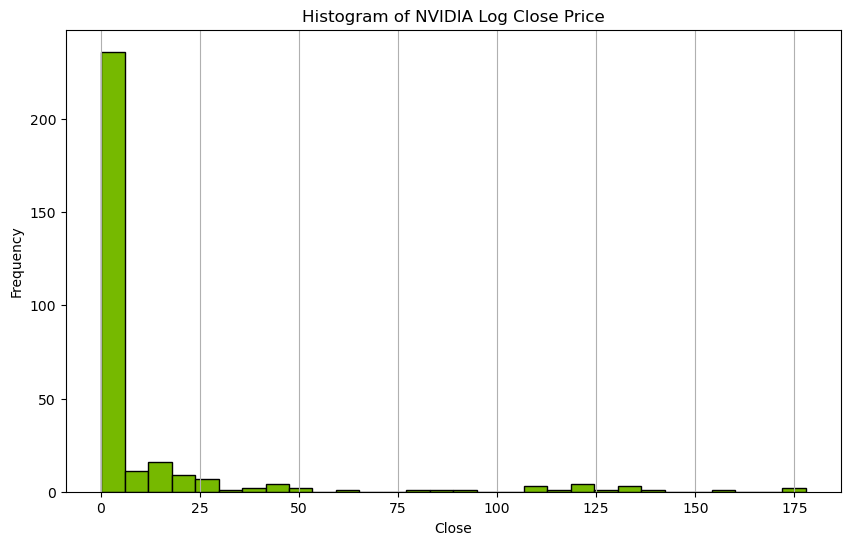

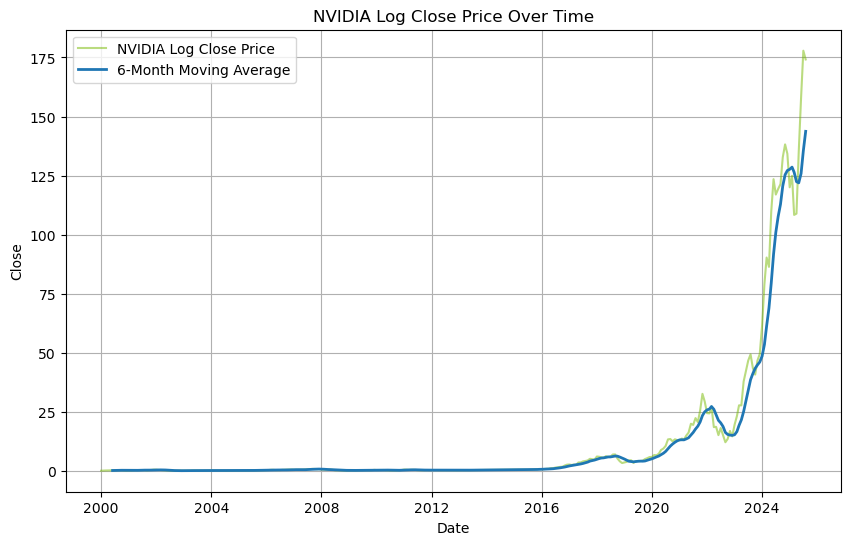

In [34]:
plot_statistics(nvidia_processed_data, 'NVIDIA Log Close Price', result_dir=RESULTS_DIR, color = NVIDIA_DATASET_COLOR, notebook_plot=True)

In [47]:
nvidia_processed_log_data  = process_stock_data(nvidia_raw_data, 'NVIDIA')
nvidia_processed_log_data.head()

--- Processing NVIDIA data---
Processing NVIDIA...


,Date,Log Close Price
0,2000-01-01,-2.647947
1,2000-02-01,-2.101678
2,2000-03-01,-1.823993
3,2000-04-01,-1.770520
4,2000-05-01,-1.523266


--- Plotting basic statistics for NVIDIA Log Close Price ---


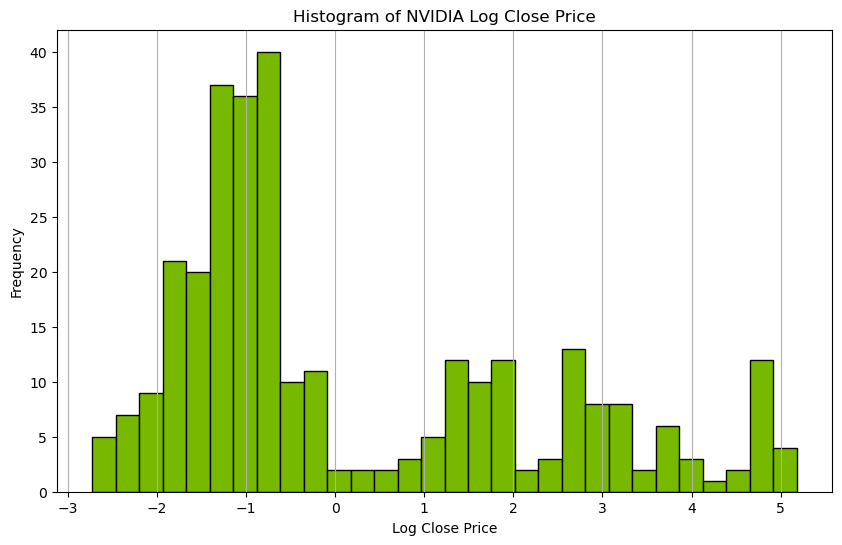

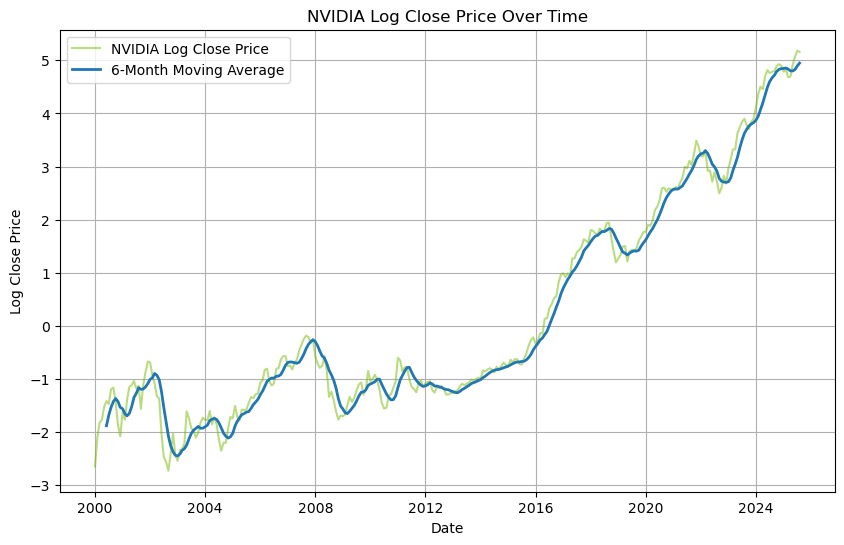

In [48]:
plot_statistics(nvidia_processed_log_data, 'NVIDIA Log Close Price', result_dir=RESULTS_DIR, color = NVIDIA_DATASET_COLOR, notebook_plot=True)

# Plot Correlation Analysis

--- Plotting statistics for NVIDIA Log Close Price and Unemployment Rate---


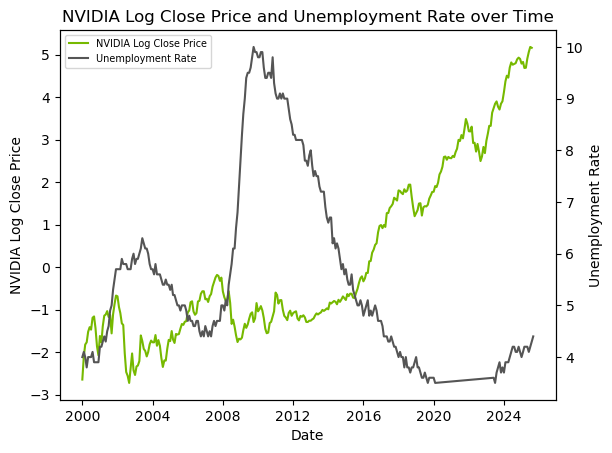

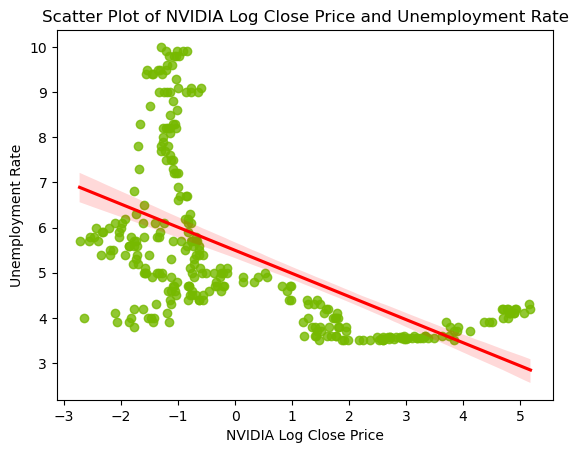

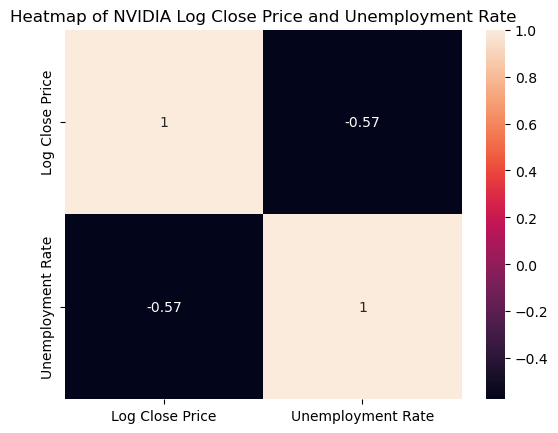

In [37]:
plot_correlation_analysis(nvidia_processed_log_data, fred_processed_data, NVIDIA_DATASET_COLOR, UNRATE_DATASET_COLOR, 'NVIDIA Log Close Price', 'Unemployment Rate', result_dir=RESULTS_DIR, notebook_plot=True)

--- Plotting statistics for SPY Log Close Price and Unemployment Rate---


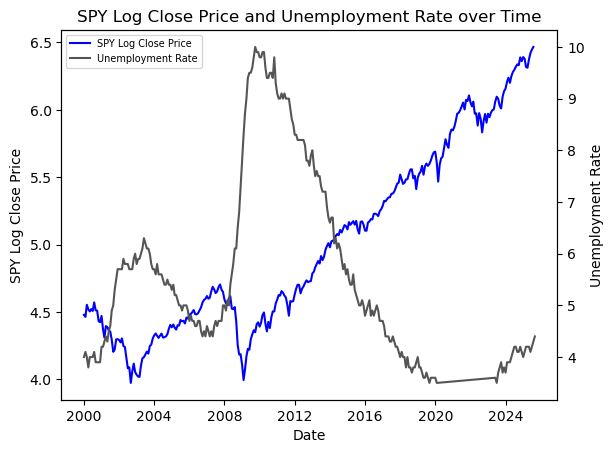

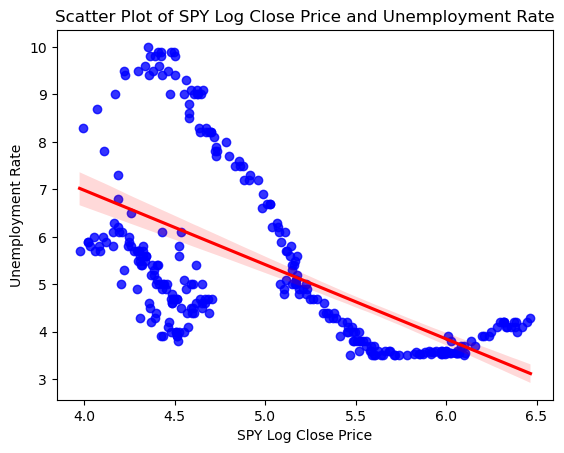

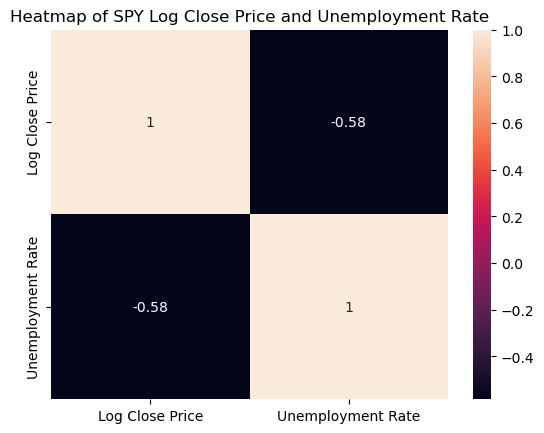

In [38]:
plot_correlation_analysis(spy_processed_log_data, fred_processed_data, SPY_DATASET_COLOR, UNRATE_DATASET_COLOR, 'SPY Log Close Price', 'Unemployment Rate', result_dir=RESULTS_DIR, notebook_plot=True)

--- Plotting statistics for NVIDIA Log Close Price and SPY Log Close Price and Unemployment Rate---


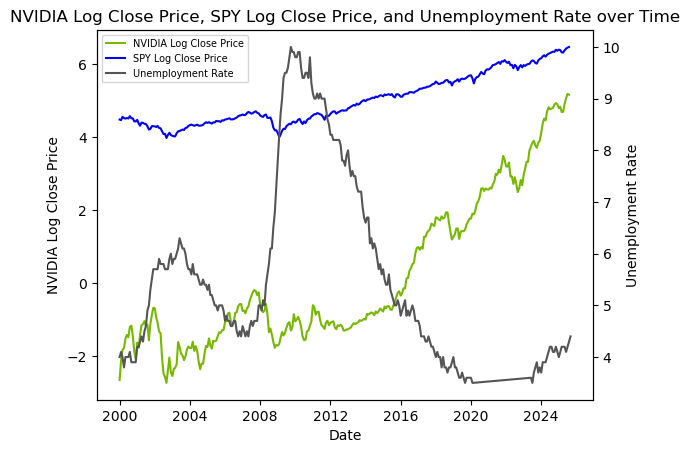

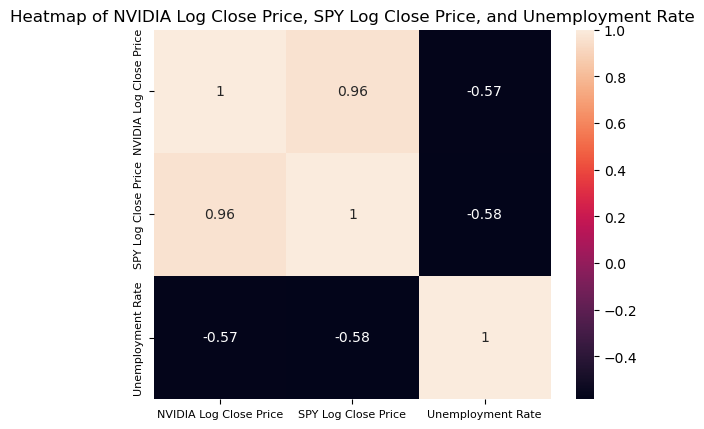

In [39]:
plot_correlation_analysis(nvidia_processed_log_data, spy_processed_log_data, NVIDIA_DATASET_COLOR, SPY_DATASET_COLOR, 'NVIDIA Log Close Price', 'SPY Log Close Price', fred_processed_data, UNRATE_DATASET_COLOR, 'Unemployment Rate', result_dir=RESULTS_DIR, notebook_plot=True)

# Pre AI BOOM

In [41]:
fred_processed_data_pre_ai_boom = fred_processed_data[fred_processed_data['Date'] < AI_BOOM_START_DATE]
nvidia_processed_log_data_pre_ai_boom = nvidia_processed_log_data[nvidia_processed_log_data['Date'] < AI_BOOM_START_DATE]
spy_processed_log_data_pre_ai_boom = spy_processed_log_data[spy_processed_log_data['Date'] < AI_BOOM_START_DATE]

--- Plotting statistics for NVIDIA Log Close Price and Unemployment Rate---


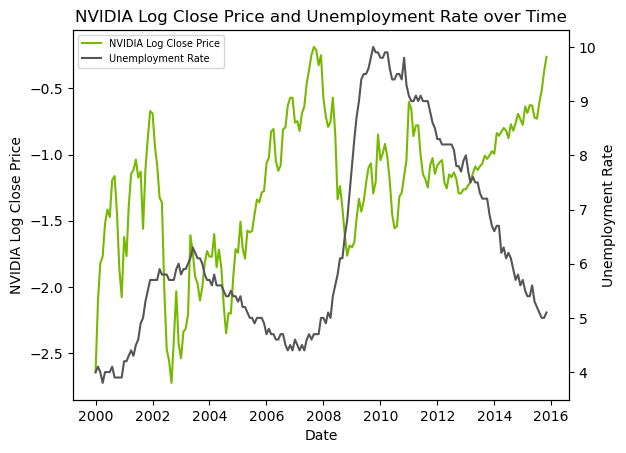

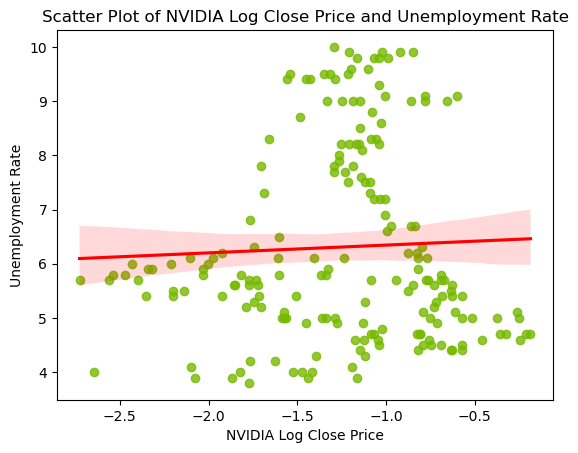

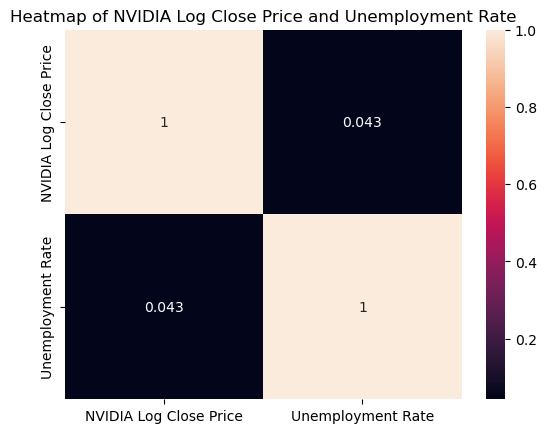

In [42]:
plot_correlation_analysis(nvidia_processed_log_data_pre_ai_boom, fred_processed_data_pre_ai_boom, NVIDIA_DATASET_COLOR, UNRATE_DATASET_COLOR, 'NVIDIA Log Close Price', 'Unemployment Rate',  ai_boom= 'Pre', notebook_plot=True)

--- Plotting statistics for NVIDIA Log Close Price and SPY Log Close Price and Unemployment Rate---


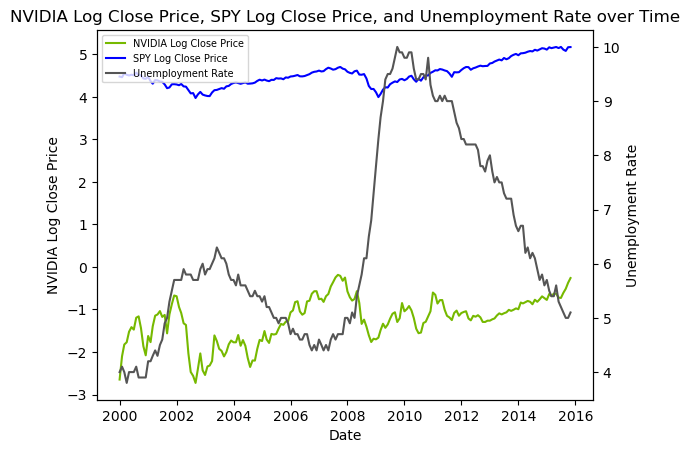

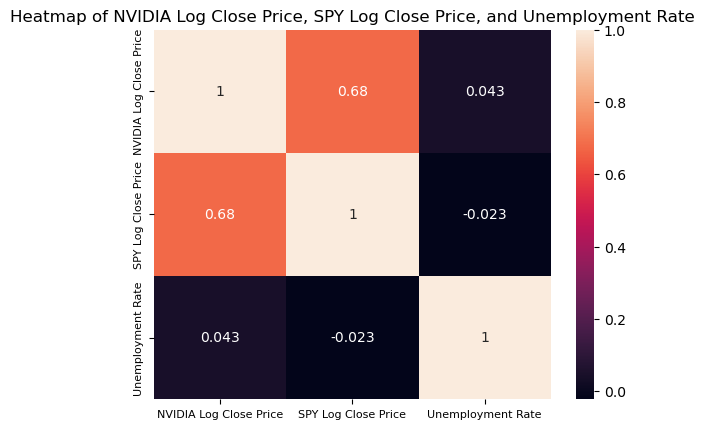

In [43]:
plot_correlation_analysis(nvidia_processed_log_data_pre_ai_boom, spy_processed_log_data_pre_ai_boom, NVIDIA_DATASET_COLOR, SPY_DATASET_COLOR, 'NVIDIA Log Close Price', 'SPY Log Close Price', fred_processed_data_pre_ai_boom, UNRATE_DATASET_COLOR, 'Unemployment Rate', result_dir= RESULTS_DIR, ai_boom= 'Pre', notebook_plot=True)

# Post AI Boom

In [44]:
fred_processed_data_post_ai_boom = fred_processed_data[fred_processed_data['Date'] >= AI_BOOM_START_DATE]
nvidia_processed_log_data_post_ai_boom = nvidia_processed_log_data[nvidia_processed_log_data['Date'] >= AI_BOOM_START_DATE]
spy_processed_log_data_post_ai_boom = spy_processed_log_data[spy_processed_log_data['Date'] >= AI_BOOM_START_DATE]

--- Plotting statistics for NVIDIA Log Close Price and Unemployment Rate---


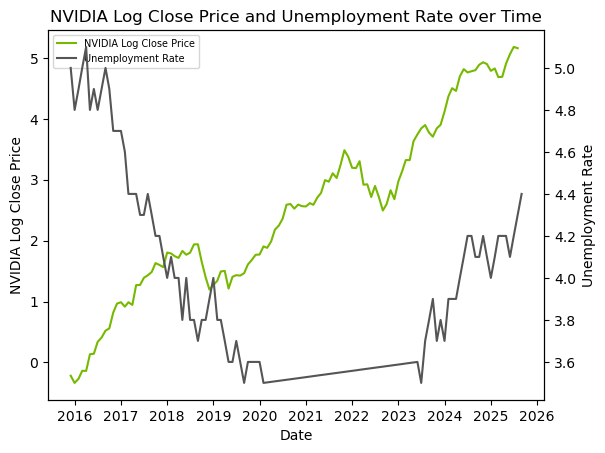

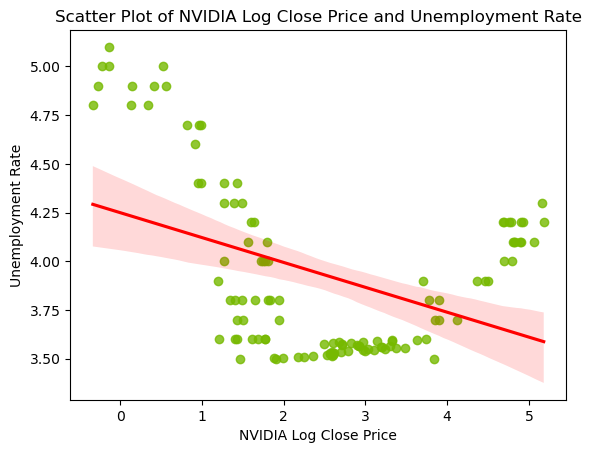

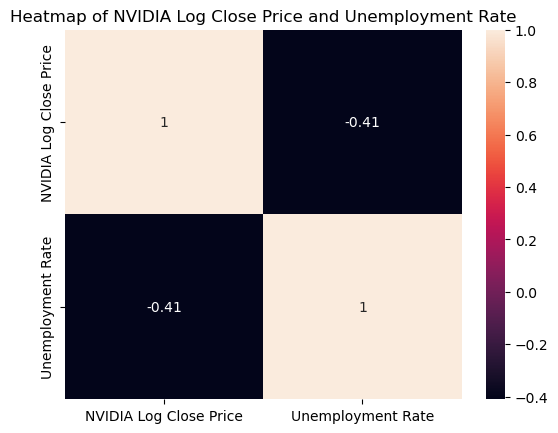

In [45]:
plot_correlation_analysis(nvidia_processed_log_data_post_ai_boom, fred_processed_data_post_ai_boom, NVIDIA_DATASET_COLOR, UNRATE_DATASET_COLOR, 'NVIDIA Log Close Price', 'Unemployment Rate',  ai_boom= 'Post', notebook_plot=True)

--- Plotting statistics for NVIDIA Log Close Price and SPY Log Close Price and Unemployment Rate---


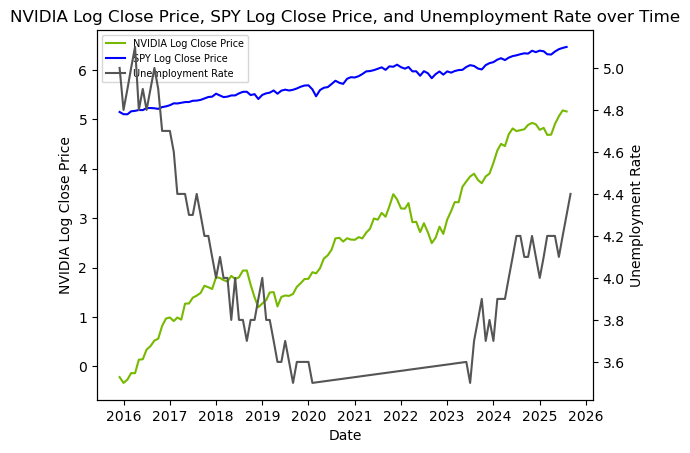

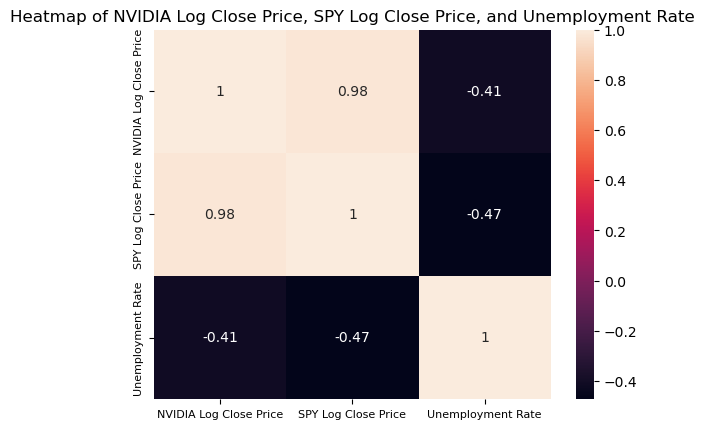

In [46]:
plot_correlation_analysis(nvidia_processed_log_data_post_ai_boom, spy_processed_log_data_post_ai_boom, NVIDIA_DATASET_COLOR, SPY_DATASET_COLOR, 'NVIDIA Log Close Price', 'SPY Log Close Price', fred_processed_data_post_ai_boom, UNRATE_DATASET_COLOR, 'Unemployment Rate', result_dir= RESULTS_DIR, ai_boom= 'Post', notebook_plot=True)